## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isnull().any().any()

False

In [4]:
X.agg(['dtypes', 'nunique']) 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
nunique,126,133,79,63,53,97,132,39,101,132,78,122,121


**Личный комментарий:**
В наборе данных нет ни пропущенных значений, ни категориальных переменных.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

**Личный комментарий:**
Вместо np.random.seed() использовался random_state.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn import preprocessing

attributes = ['alcohol', 'magnesium']

normalizer = preprocessing.StandardScaler()
X_train_norm = normalizer.fit_transform(X_train[attributes])
X_test_norm = normalizer.fit_transform(X_test[attributes])

In [7]:
from sklearn.neighbors import KNeighborsClassifier

index = [1, 3, 5, 10, 15, 25]

for i in index:
  clf = KNeighborsClassifier(n_neighbors=i)
  y_train_pred = clf.fit(X_train_norm, y_train).predict(X_train_norm)
  y_test_pred = clf.fit(X_train_norm, y_train).predict(X_test_norm)
  print(f"k = {i}; Train = {np.mean(y_train==y_train_pred):.3f}; Test = {np.mean(y_test==y_test_pred):.3f}")


k = 1; Train = 1.000; Test = 0.667
k = 3; Train = 0.806; Test = 0.722
k = 5; Train = 0.750; Test = 0.685
k = 10; Train = 0.734; Test = 0.704
k = 15; Train = 0.734; Test = 0.815
k = 25; Train = 0.669; Test = 0.815


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [8]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [9]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

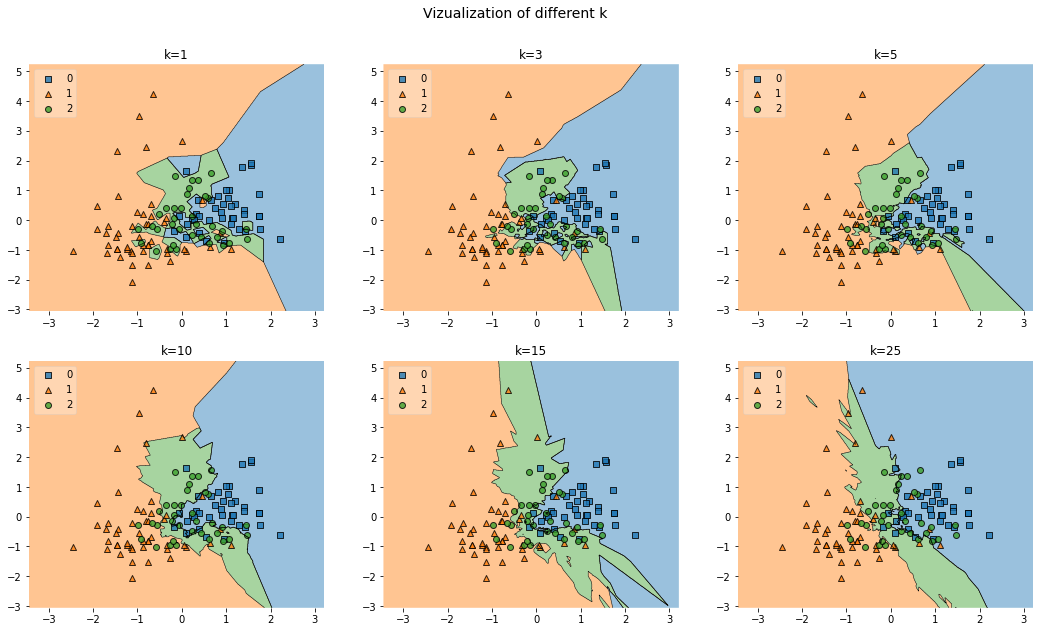

In [10]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)
plt.figure(figsize=(18, 10))
plt.suptitle('Vizualization of different k', y = 0.96, fontsize = 14)
labels = ['k=1', 'k=3', 'k=5', 'k=10', 'k=15', 'k=25']
clfs = [KNeighborsClassifier(n_neighbors=1).fit(X_train_norm, y_train), KNeighborsClassifier(n_neighbors=3).fit(X_train_norm, y_train), 
        KNeighborsClassifier(n_neighbors=5).fit(X_train_norm, y_train), KNeighborsClassifier(n_neighbors=10).fit(X_train_norm, y_train), 
        KNeighborsClassifier(n_neighbors=15).fit(X_train_norm, y_train), KNeighborsClassifier(n_neighbors=25).fit(X_train_norm, y_train)]
for clf, lab, grd in zip(clfs,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X_train_norm), y=y_train, clf=clf, legend=2)
    plt.title(lab)
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

**Личный комментарий:**
15 соседей является оптимальным числом для обучения классификатора. Это подтверждают результаты выполнения задания 1.3 (наибольшая доля правильных ответов на тестовой выборке при лучшем варианте среди доли правильных ответов на тренировочной выборке). Кроме того, полученные решающие поверхности в задании 1.5 показывают идентичный результат. 15 соседей является оптимальным вариантом, так как модель игнорирует слишком отдаленные объекты при классификации, оставляя при этом минимальное количество неправильных ответов.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

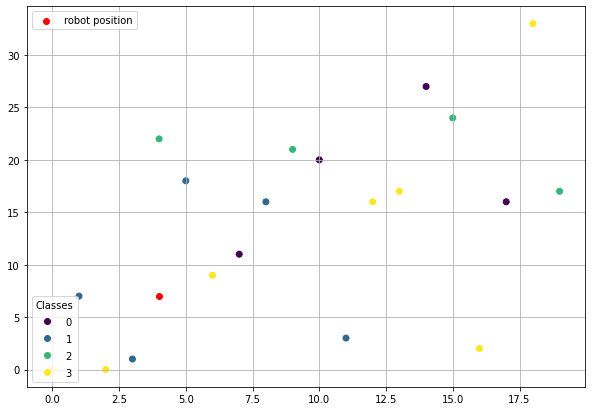

In [11]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [initial_position]
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k)
        self.knn.fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        position = self.trajectory[-1]
        chance = np.random.binomial(1, 0.8)

        if chance == True:
          pred = self.knn.predict([position])
          movement = self.mapping[pred[0]]
        else:
          movement = self.mapping[0]

        self.trajectory.append(position + movement)

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [14]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.array(robot.trajectory)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

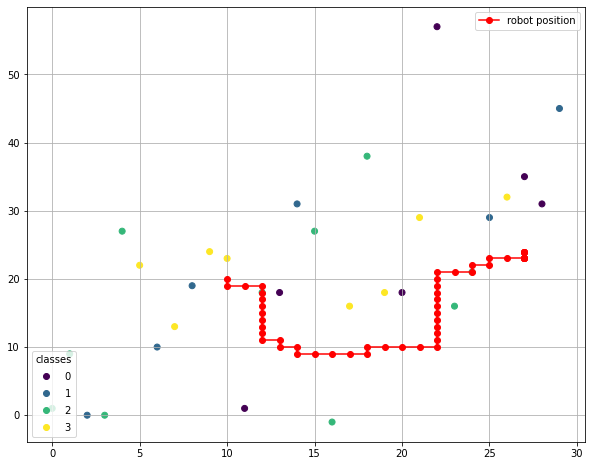

In [15]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

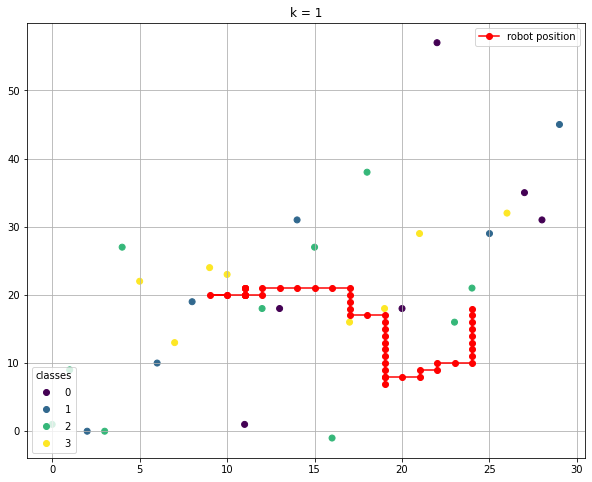

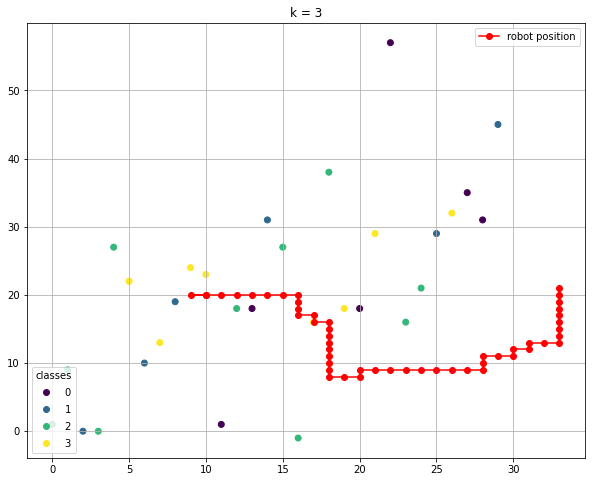

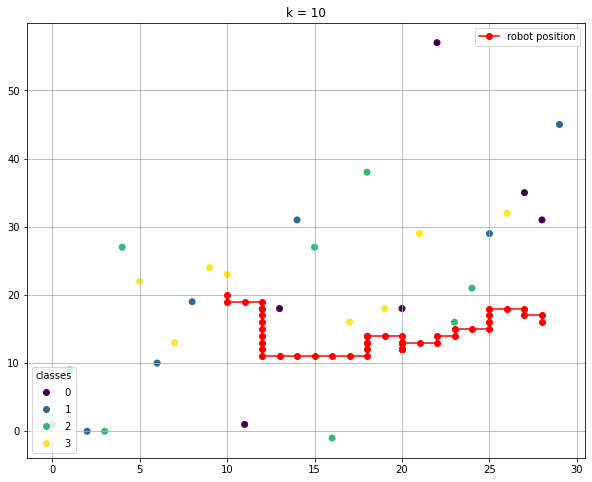

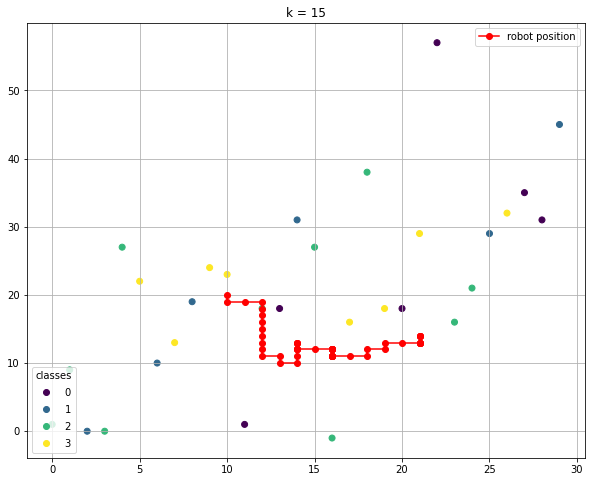

In [16]:
index = [1, 3, 10, 15]
for k in index:
    conduct_experiment(x, mean = 3, std = 10, k = k, n_movements = 50)
    plt.title(f'k = {k}')
plt.show()

**Личный комментарий:**
Число соседей влияет на точность траектории относительно маркеров, а также на то, насколько далеко пройдет робот. Если осмысленно назначить классы, то можно контролировать движение и дальность пути.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [17]:
data = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw04-knn-linreg-data/diamonds.csv', sep=',')
data = data.drop('Unnamed: 0', axis=1)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [18]:
data.isnull().any().any()

False

**Личный комментарий:**
В наборе данных нет пропущенных значений.

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

**Личный комментарий:**
В наборе данных нет бессмыследнных столбцов.

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

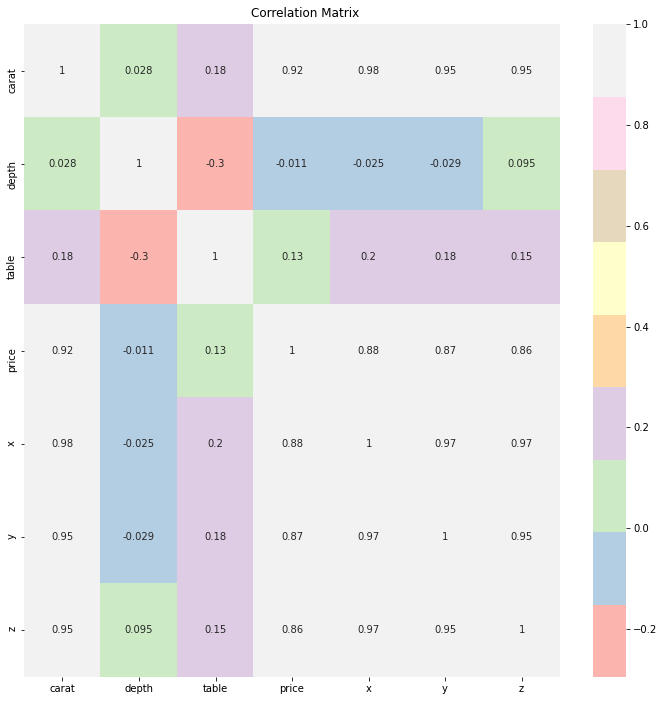

In [19]:
import seaborn as sns
Categorical = ['cut', 'color', 'clarity']
real_data = data.drop(data[Categorical], axis=1)
matrix = real_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(matrix,cmap="Pastel1",annot=True)
plt.suptitle('Correlation Matrix', y = 0.9, x = 0.45)
plt.show()

**Личный комментарий:**
С целевой переменной больше всего коррелируют количество карат и размеры камня (x, y, z).

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [20]:
data = pd.get_dummies(data, drop_first=True)
data.head(5)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [21]:
X = data.drop(['price'],axis=1)
y=data['price']
X_train,X_test,y_train,y_test = train_test_split(X , y, random_state=0, test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [22]:
from sklearn.compose import ColumnTransformer
real_attributes = ['carat', 'depth', 'table', 'x', 'y', 'z']
normalizer = ColumnTransformer([
    ('Real_transformer', preprocessing.StandardScaler(), real_attributes)
    ], remainder='passthrough')
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.fit_transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression().fit(X_train_norm,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train_norm))))
print ("Test:  {}".format(mean_squared_error(y_test, lr.predict(X_test_norm))))

Train: 1284661.862119126
Test:  1258940.850493566


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [24]:
coef = pd.DataFrame(lr.coef_, X_train.columns, columns=['Coefficients'])
coef.sort_values(by='Coefficients', ascending=False)

,Coefficients
clarity_IF,5333.555069
carat,5278.119984
clarity_VVS1,5021.558583
clarity_VVS2,4954.598502
clarity_VS1,4592.448267
clarity_VS2,4272.557381
clarity_SI1,3670.378092
clarity_SI2,2701.868098
cut_Ideal,795.786817
cut_Premium,721.797535


**Личный комментарий:**
Рассмотрим коэффициенты, которые по модулю превышают 4900. В них входят три высших качества чистоты камня, а также количество карат. Кроме того, остальные варианты качества чистоты камня и два худших цвета бриллианта имеют заметно большие коэффициенты, нежели другие признаки.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [25]:
from sklearn.linear_model import Ridge, Lasso

lasso = Lasso(10).fit(X_train_norm,y_train)
lasso_coef = pd.DataFrame(lasso.coef_, X_train.columns, columns=['Lasso Coefficients'])
lasso_coef.sort_values(by='Lasso Coefficients', ascending=False)

,Lasso Coefficients
carat,4717.430499
clarity_IF,1366.347374
clarity_VVS1,1242.991239
clarity_VVS2,1240.710294
clarity_VS1,909.413824
clarity_VS2,655.593919
cut_Ideal,157.773311
cut_Very Good,82.912360
clarity_SI1,70.861922
cut_Premium,64.964212


In [26]:
ridge = Ridge(10).fit(X_train_norm,y_train)
ridge_coef = pd.DataFrame(ridge.coef_, X_train.columns, columns=['Ridge Coefficients'])
ridge_coef.sort_values(by='Ridge Coefficients', ascending=False)

,Ridge Coefficients
carat,5228.441290
clarity_IF,4760.472197
clarity_VVS1,4470.745336
clarity_VVS2,4411.391730
clarity_VS1,4055.762262
clarity_VS2,3741.392263
clarity_SI1,3142.790422
clarity_SI2,2182.154617
cut_Ideal,823.308089
cut_Premium,746.147154


**Личный комментарий:**
При использовании Lasso-регрессии сильно уменьшается вес признаков, в то время как при Ridge-регрессии вес уменьшился гораздо менее заметно. В Lasso-регрессии остался только один признак, коэффициент которого превышает 4500. В изначальной модели слишком много признаков сильно влияли на оценку, тем самым затрудняя её, что говорит о проблеме мультиколлинеарности.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

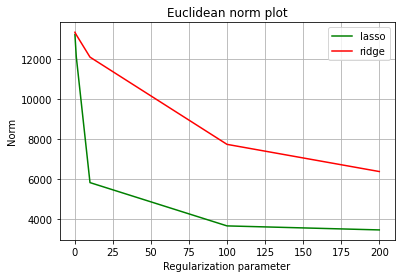

In [27]:
param = [0.1, 1, 10, 100, 200]
y_lasso = []
y_ridge = []
for i in range(len(param)):
  lasso = Lasso(alpha = param[i]).fit(X_train_norm,y_train)
  ridge = Ridge(alpha = param[i]).fit(X_train_norm,y_train)
  lasso_norm = np.linalg.norm(lasso.coef_)
  ridge_norm = np.linalg.norm(ridge.coef_)
  y_lasso.append(lasso_norm)
  y_ridge.append(ridge_norm)
fig, ax = plt.subplots()
ax.plot(param, y_lasso, color = 'green', label='lasso')
ax.plot(param, y_ridge, color = 'red', label='ridge')
plt.grid()
plt.title("Euclidean norm plot")
plt.xlabel("Regularization parameter")
plt.ylabel('Norm')
plt.legend()

**Личный комментарий:**
Lasso-регрессия гораздо агрессивнее уменьшает веса. Именно поэтому Lasso-регрессия часто используется при отборе признаков. Лишние признаки либо сильно теряют свой вес, либо их коэффициенты обнуляются, таким образом решая проблему мультиколлинеарности.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [28]:
from sklearn.linear_model import LassoCV
lr = LassoCV(alphas = param, cv=5, random_state=0).fit(X_train_norm, y_train)
print(f'Alphas: {lr.alphas_}')
print()
print(f'Mean: {np.mean(lr.mse_path_, axis=1)}')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1177271856.2345657, tolerance: 48309472.87280813
  tol, rng, random, positive)


Alphas: [2.e+02 1.e+02 1.e+01 1.e+00 1.e-01]

Mean: [2449043.71149809 2240369.32710809 1517680.18156032 1292173.07832109
 1293501.1521932 ]


**Личный комментарий:**
Наибольшее качество достигается при выборе параметра $\alpha$ = 1

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [29]:
lasso = Lasso(1).fit(X_train_norm,y_train)

lasso_coef = pd.DataFrame(lasso.coef_, X_train.columns, columns=['Coefficients'])
lasso_coef.sort_values(by='Coefficients', ascending=False)

,Coefficients
carat,5219.223470
clarity_IF,4792.951485
clarity_VVS1,4500.322779
clarity_VVS2,4440.810599
clarity_VS1,4082.077200
clarity_VS2,3770.073303
clarity_SI1,3171.139100
clarity_SI2,2206.816201
cut_Ideal,694.910272
cut_Premium,619.884275


**Личный комментарий:**
Наиболее информативными оказались признак, связанный с количеством карат. Однако, при выбранном параметре увеличился вес других признаков, в том числе качество чистоты бриллианта. Скорее всего это связано с тем, что размеры камня, его обработка и цвет не так важны для потенциальных клиентов, как изначальное качество самого камня.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [30]:
print ("Lasso Test: {}".format(mean_squared_error(y_test, lasso.predict(X_test_norm))))

Lasso Test: 1265898.7461823488


**Личный комментарий:**
Лассо-регрессия выдает чуть большую среднеквадратичную ошибку, чем изначальная модель (1265898.7461823488 против 1258940.850493566). Скорее всего, это связано с тем, что при выбранном параметре многие признаки остались с большим весом, а зануление произошло только у признака 'y', что повлияло на итоговое качество модели. Можно сказать, что оригинальная модель лучше подходит для предсказаний, в то время как Lasso-регрессий позволяет выбрать наиболее значимые навыки для оценки.